## Importing libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the dataset
df_jobs = pd.read_csv('C:/Users/Arvind Maan/salaries.csv')

# check the dimension of the dataset
print(df_jobs.shape)


(13632, 11)


In [3]:
# return the first 5 rows of the dataset
df_jobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Data Scientist,283800,USD,283800,US,0,US,M
1,2024,SE,FT,Data Scientist,234700,USD,234700,US,0,US,M
2,2024,EN,FT,Business Intelligence Analyst,86000,USD,86000,US,0,US,M
3,2024,EN,FT,Business Intelligence Analyst,53000,USD,53000,US,0,US,M
4,2024,SE,FT,Data Scientist,187158,USD,187158,US,0,US,M


### We have 11 attributes in the dataset, which are: 
1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year with the following possible values:
 EN: Entry-level / Junior
 MI: Mid-level / Intermediate
 SE: Senior-level / Expert
 EX: Executive-level / Director
3. employment_type: The type of employement for the role:
 PT: Part-time
 FT: Full-time
 CT: Contract
 FL: Freelance
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year via data from fxdata.foorilla.com).
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely, possible values are as follows:
 0: No remote work (less than 20%)
 50: Partially remote/hybrid
 100: Fully remote (more than 80%)
10. company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
11. company_size: The average number of people that worked for the company during the year:
 S: less than 50 employees (small)
 M: 50 to 250 employees (medium)
 L: more than 250 employees (large)

In [4]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13632 entries, 0 to 13631
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           13632 non-null  int64 
 1   experience_level    13632 non-null  object
 2   employment_type     13632 non-null  object
 3   job_title           13632 non-null  object
 4   salary              13632 non-null  int64 
 5   salary_currency     13632 non-null  object
 6   salary_in_usd       13632 non-null  int64 
 7   employee_residence  13632 non-null  object
 8   remote_ratio        13632 non-null  int64 
 9   company_location    13632 non-null  object
 10  company_size        13632 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.1+ MB


### Exploratory Data Analysis (EDA)

a) **experience_level**

We have four possible values: 
- EX: Executive-level / Director 
- SE: Senior-level / Expert
- MI: Mid-level / Intermediate
- EN: Entry-level / Junior


In [5]:
df_jobs['experience_level'] = df_jobs['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry',
    'EX': 'Executive',
    'MI': 'Mid',
})

Senior       9042
Mid          3217
Entry         980
Executive     393
Name: experience_level, dtype: int64

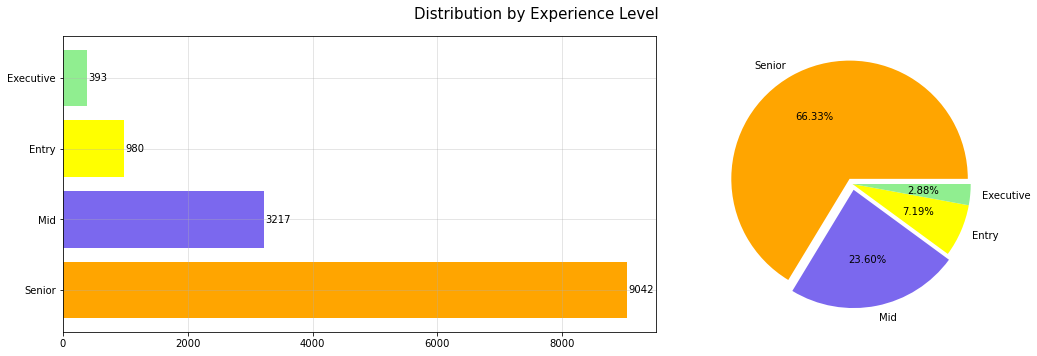

In [50]:
# distribution of the samples by 'experience_level'
experience = df_jobs['experience_level'].value_counts()
display(experience)

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=experience.index, width=experience.values, color=['orange','mediumslateblue','yellow','lightgreen'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(experience):
    axes[0].text(values+20, index, str(values), va='center')
    
axes[1].pie(experience.values, labels=experience.index, explode=[0.05,0.05,0,0], colors=['orange','mediumslateblue','yellow','lightgreen'], autopct='%.2f%%')

figure.suptitle('Distribution by Experience Level', fontsize=15)
plt.tight_layout()
plt.show()

b) **employment_type**

We have four possible values: 
- PT: Part-time 
- FT: Full-time
- CT: Contract
- FL: Freelance

In [11]:
df_jobs['employment_type'] = df_jobs['employment_type'].replace({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance',
})



Full-time    13572
Contract        26
Part-time       22
Freelance       12
Name: employment_type, dtype: int64

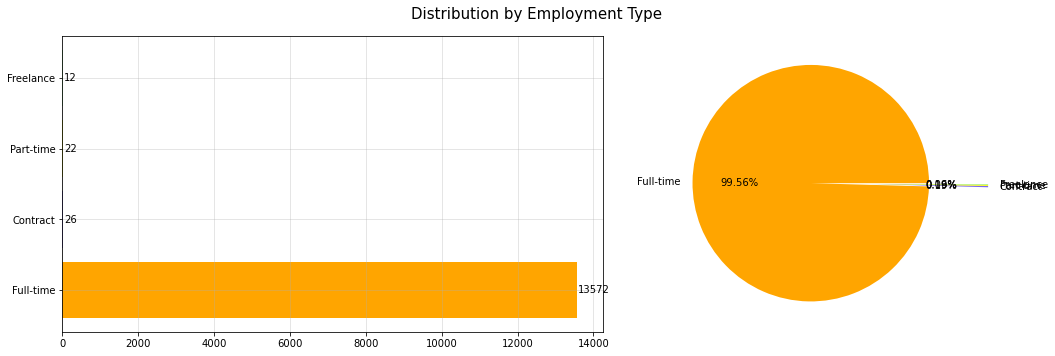

In [51]:
# distribution of the samples by 'employment_type'
employ = df_jobs['employment_type'].value_counts()
display(employ)

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=employ.index, width=employ.values, color=['orange','mediumslateblue','yellow','lightgreen'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(employ):
    axes[0].text(values+20, index, str(values), va='center')
    
axes[1].pie(employ.values, labels=employ.index, explode=[0.5,0,0,0], colors=['orange','mediumslateblue','yellow','lightgreen'], autopct='%.2f%%')

figure.suptitle('Distribution by Employment Type', fontsize=15)
plt.tight_layout()
plt.show()

c) **job_title**

Number of job title in the dataset:  144


Data Engineer                     2947
Data Scientist                    2808
Data Analyst                      2027
Machine Learning Engineer         1432
Research Scientist                 425
Analytics Engineer                 377
Applied Scientist                  362
Data Architect                     331
Research Engineer                  254
Business Intelligence Engineer     216
Name: job_title, dtype: int64

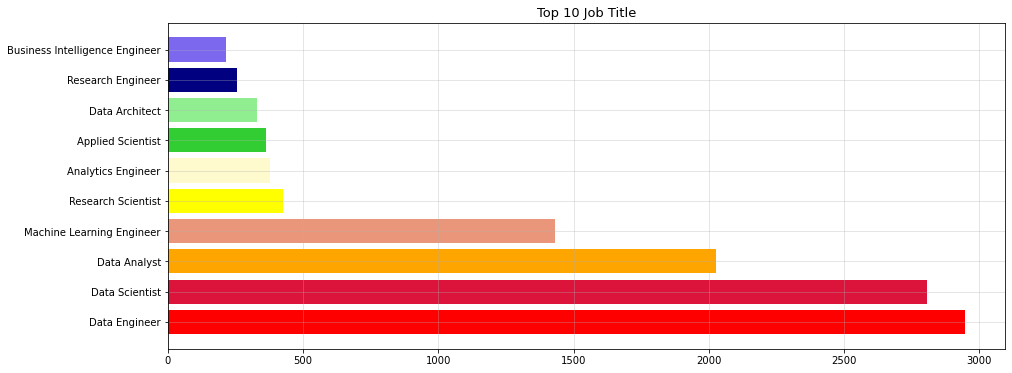

In [75]:
num_job = df_jobs['job_title'].nunique()
print('Number of job title in the dataset: ', num_job)

# visualize the top 10 most common jobs
top10_job = df_jobs['job_title'].value_counts().sort_values(ascending=False)[:10]
display(top10_job)

plt.figure(figsize=(15,6))
plt.barh(y=top10_job.index, width=top10_job.values, color=['red','crimson','orange','darksalmon','yellow','lemonchiffon','limegreen','lightgreen','navy','mediumslateblue'])
plt.grid(alpha=0.4)


plt.title('Top 10 Job Title', fontsize=13)
plt.show()

d) **salary**

Gross salary amount paid

count    1.363200e+04
mean     1.661409e+05
std      3.704632e+05
min      1.400000e+04
25%      1.039770e+05
50%      1.422000e+05
75%      1.872590e+05
max      3.040000e+07
Name: salary, dtype: float64

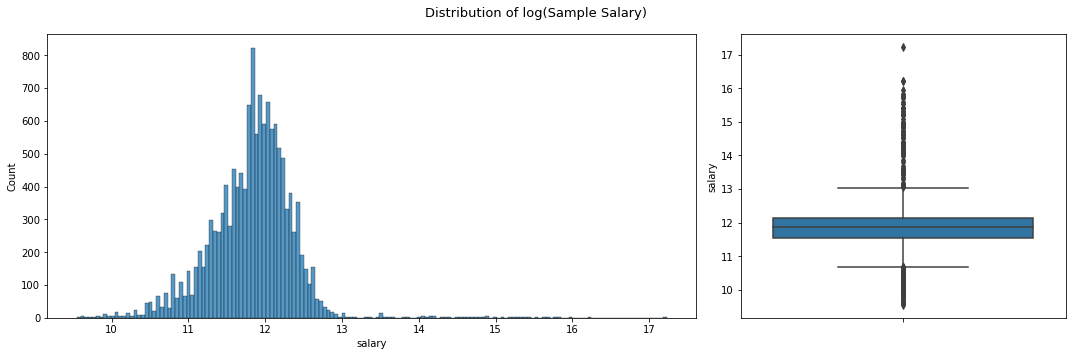

In [20]:
display(df_jobs['salary'].describe())

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df_jobs, x=np.log(df_jobs['salary']), ax=axes[0])
sns.boxplot(data=df_jobs, y=np.log(df_jobs['salary']), ax=axes[1])

figure.suptitle('Distribution of log(Sample Salary)', fontsize=13)
plt.tight_layout()
plt.show()

e) **salary_in_usd**

The salary in USD (FX rate divided by avg. USD rate of respective year)


count     13632.000000
mean     149762.951731
std       68243.138335
min       15000.000000
25%      103000.000000
50%      141525.000000
75%      185900.000000
max      774000.000000
Name: salary_in_usd, dtype: float64

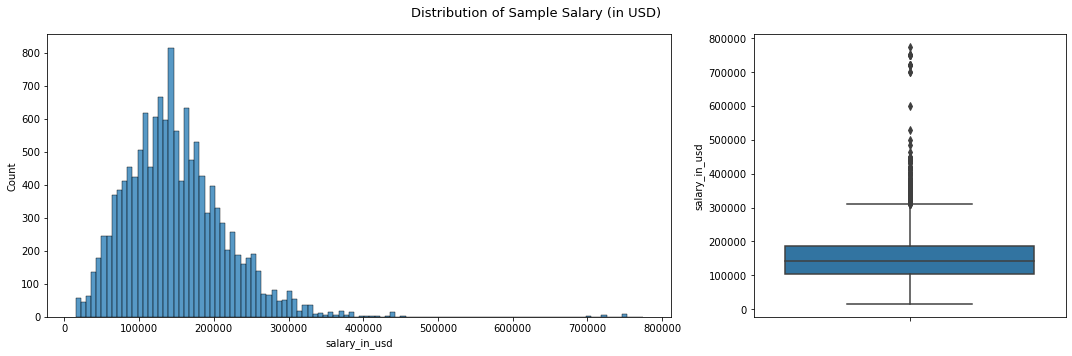

In [24]:
display(df_jobs['salary_in_usd'].describe())

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=df_jobs, x=(df_jobs['salary_in_usd']), ax=axes[0])
sns.boxplot(data=df_jobs, y=(df_jobs['salary_in_usd']), ax=axes[1])

figure.suptitle('Distribution of Sample Salary (in USD)', fontsize=13)
plt.tight_layout()
plt.show()


f) **remote_ratio**

The overall amount of work done, possible values are as follows:

- 0: No remote work (less than 20%)
- 50: Partially remote/hybrid
- 100: Fully remote (more than 80%)

In [25]:
df_jobs['remote_ratio'] = df_jobs['remote_ratio'].replace({
    0: 'No remote',
    50: 'Hybrid',
    100: 'Fully remote'
})

Fully remote    4454
Hybrid           240
No remote       8938
Name: remote_ratio, dtype: int64

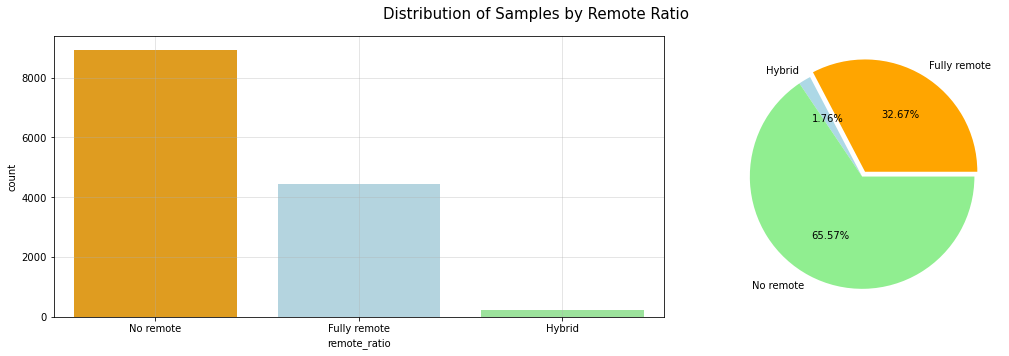

In [48]:
remote = df_jobs['remote_ratio'].value_counts().sort_index()
display(remote)

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
sns.countplot(data=df_jobs, x=df_jobs['remote_ratio'], palette=['orange','lightblue','lightgreen'], ax=axes[0])
axes[0].grid(alpha=0.4)

    
axes[1].pie(remote.values, labels=remote.index, explode=[0.05,0,0], colors=['orange','lightblue','lightgreen'], autopct='%.2f%%')

figure.suptitle('Distribution of Samples by Remote Ratio', fontsize=15)
plt.tight_layout()
plt.show()

f) **company_size**

The possible values are as follows:

- S: less than 50 employees (small)
- M: 50 to 250 employees (medium)
- L: more than 250 employees (large)

In [33]:
df_jobs['company_size'] = df_jobs['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'
})

Medium    12499
Large       955
Small       178
Name: company_size, dtype: int64

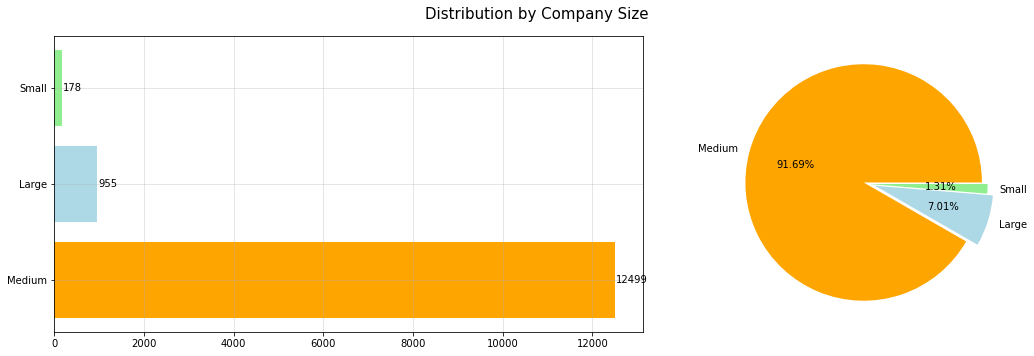

In [53]:
# distribution of the samples by 'company_size'
com_size = df_jobs['company_size'].value_counts()
display(com_size)

# visualization
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=com_size.index, width=com_size.values, color=['orange','lightblue','lightgreen'])
axes[0].grid(alpha=0.4)

for index, values in enumerate(com_size):
    axes[0].text(values+20, index, str(values), va='center')
    
axes[1].pie(com_size.values, labels=com_size.index, explode=[0.05,0.05,0,], colors=[ 'orange','lightblue','lightgreen'], autopct='%.2f%%')

figure.suptitle('Distribution by Company Size', fontsize=15)
plt.tight_layout()
plt.show()

f) **salary change over the years for every experience level**

In [103]:
year = df_jobs.groupby(['experience_level','work_year']).salary_in_usd.mean().reset_index()

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

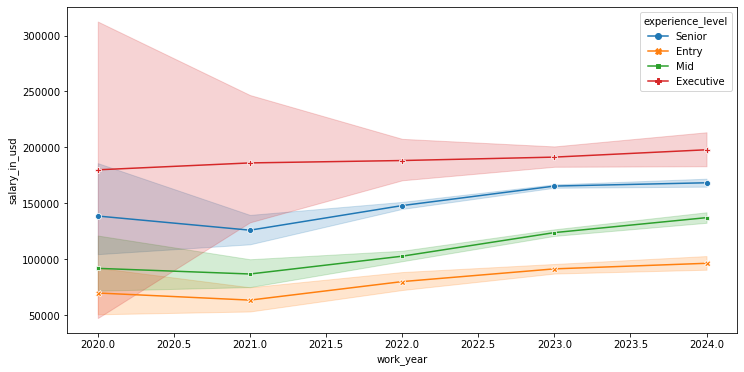

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(data= df_jobs, x='work_year', y= 'salary_in_usd', hue='experience_level',style='experience_level',markers=True, dashes=False)

### Statistical Analysis

**1. Is there a significant difference between experience level and the salary (in USD)?**

One-way ANOVA F-statistic: 651.5015
P-value: 0.0

There is a significant difference in mean salary across different experience levels.


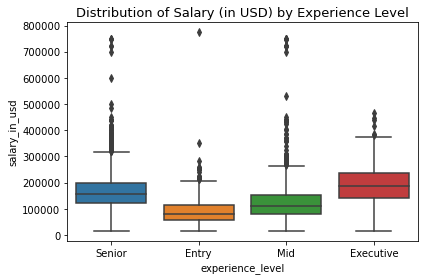

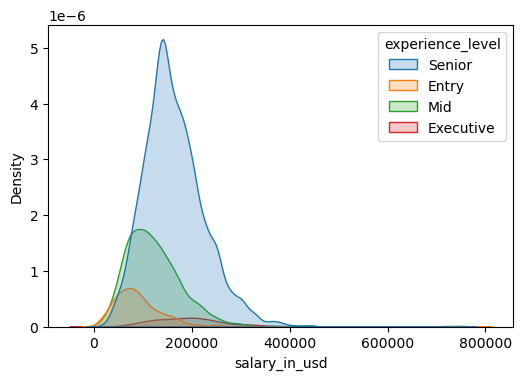

In [69]:
from scipy.stats import f_oneway

# subset the data based on experience level
fil_data = df_jobs.groupby('experience_level')
entry = fil_data.get_group('Entry')
mid = fil_data.get_group('Mid')
executive = fil_data.get_group('Executive')
senior = fil_data.get_group('Senior')

#Visualization

sns.boxplot(data=df_jobs, y='salary_in_usd', x='experience_level').set_title('Distribution of Salary (in USD) by Experience Level', fontsize=13)
plt.tight_layout()
plt.figure(dpi=100)
sns.kdeplot(data=df_jobs,x='salary_in_usd',hue='experience_level',fill=True)


# perform one-way ANOVA test
res = f_oneway(entry['salary_in_usd'],mid['salary_in_usd'],executive['salary_in_usd'],senior['salary_in_usd'])

f_statistic = round(res[0], 4)
p_value = round(res[1], 4)
    
# print the results
print(f"One-way ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# check if the association is significant
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in mean salary across different experience levels.")
else:
    print("\nThere is no significant difference in mean salary across different experience levels.")

**2. Is there a significant difference in salary (in USD) for different remote work ratio?**

One-way ANOVA F-statistic: 148.2433
P-value: 0.0

There is a significant difference in mean salary across different remote work ratio.


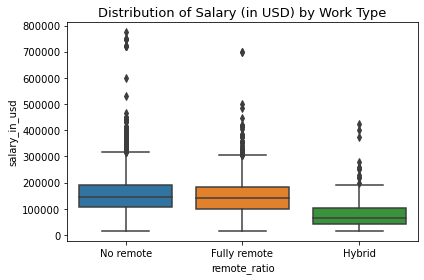

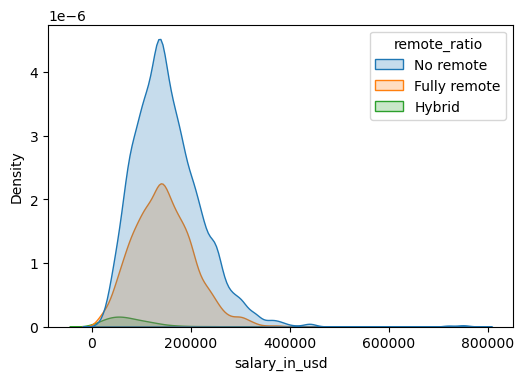

In [74]:
df_jobs['remote_ratio'] = df_jobs['remote_ratio'].astype('str')

# subset the data based on remote ratio
fil_data = df_jobs.groupby('remote_ratio')
zero = fil_data.get_group('No remote')
fifty = fil_data.get_group('Hybrid')
hundred = fil_data.get_group('Fully remote')


#Visualization

sns.boxplot(data=df_jobs, y='salary_in_usd', x='remote_ratio').set_title('Distribution of Salary (in USD) by Work Type', fontsize=13)
plt.tight_layout()
plt.figure(dpi=100)
sns.kdeplot(data=df_jobs,x='salary_in_usd',hue='remote_ratio',fill=True)

# perform one-way ANOVA test
res = f_oneway(zero['salary_in_usd'],fifty['salary_in_usd'],hundred['salary_in_usd'])

f_statistic = round(res[0], 4)
p_value = round(res[1], 4)
    
# print the results
print(f"One-way ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# check if the association is significant
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in mean salary across different remote work ratio.")
else:
    print("\nThere is no significant difference in mean salary across different remote work ratio.")
